In [1]:
import numpy as np

In [2]:
times = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 14.0, 16.0, 18.0, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 25.0, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 33.0, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 39.0, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 47.0, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 54.0, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 62.0, 63.0, 64.0, 64.5])

perturbation_windows = {
    'HFD': (21.5, 28.5),
    'V': (35.5, 42.5),
    'G': (50.5, 57.5)
}

print(len(times))

75


# Uniform thinning

In [3]:
def rarify_uniform(p: float, _timepoints: np.ndarray) -> np.ndarray:
    values_to_exclude = set()
    values_to_exclude.add(_timepoints[0])
    values_to_exclude.add(_timepoints[-1])
    for _, (start, end) in perturbation_windows.items():
        values_to_exclude.add(start)
        values_to_exclude.add(end)

    _t = np.sort(np.array([t for t in _timepoints if t not in values_to_exclude]))
    indices = np.unique(np.arange(0., float(len(_t)), 1/p).astype(int))  # first decide the indices to keep, by skipping every (1/p) but then apply rounding. Delete duplicates that may result from rounding.

    return np.sort(np.concatenate([
        _t[indices],
        np.array(list(values_to_exclude))
    ]))

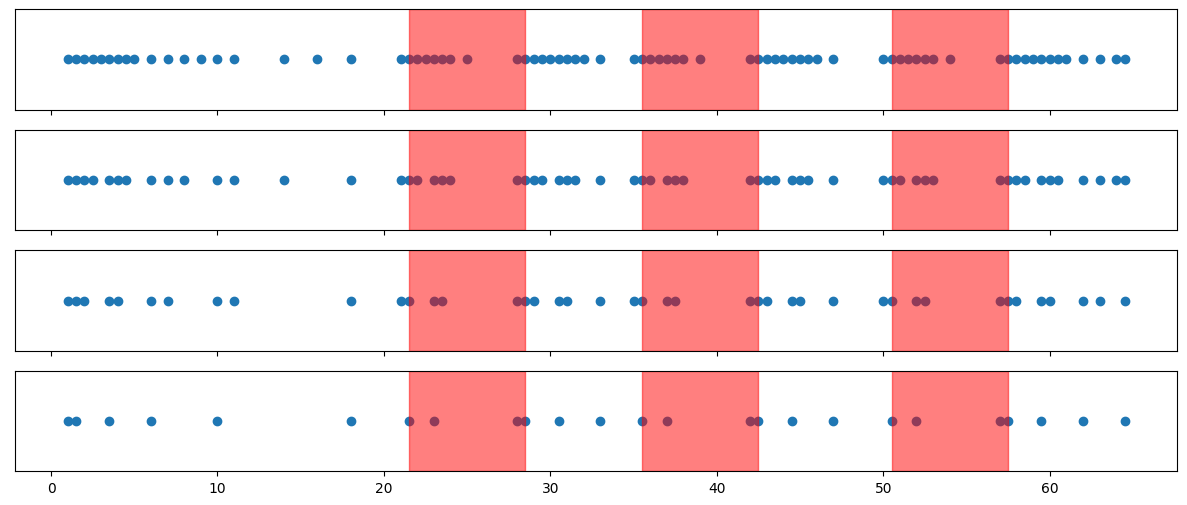

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 6))
axes[0].scatter(x=times, y=len(times) * [0.0])

# Successively rarify the timepoints.
thinned_1 = rarify_uniform(3/4, times)
axes[1].scatter(x=thinned_1, y=len(thinned_1) * [0.0])
thinned_2 = rarify_uniform(2/3, thinned_1)  # target ratio is 1/2 = (3/4) * (2/3), rarify by a factor of 2/3 from thin1
axes[2].scatter(x=thinned_2, y=len(thinned_2) * [0.0])
thinned_3 = rarify_uniform(1/2, thinned_2)  # target ratio is 1/4 = (1/2) * (1/2), rarify by a factor of 1/2 from thin2
axes[3].scatter(x=thinned_3, y=len(thinned_3) * [0.0])


# thinned_2 = rarify_uniform(8/9, thinned_1)  # target ratio is 2/3 = (3/4) * (8/9)
# axes[2].scatter(x=thinned_2, y=len(thinned_2) * [0.0])
# thinned_3 = rarify_uniform(3/4, thinned_2)  # target ratio is 1/2 = (2/3) * (3/4)
# axes[3].scatter(x=thinned_3, y=len(thinned_3) * [0.0])

for ax in axes:
    ax.set_yticks([])
    for pert, (p_start, p_end) in perturbation_windows.items():
        ax.axvspan(p_start, p_end, alpha=0.5, color='red')

In [26]:
assert set(thinned_1).issubset(set(times))
assert set(thinned_2).issubset(set(thinned_1))
assert set(thinned_3).issubset(set(thinned_2))

In [16]:
for t in thinned_3:
    print(t)

1.0
1.5
3.5
6.0
10.0
18.0
21.5
23.0
28.0
28.5
30.5
33.0
35.5
37.0
42.0
42.5
44.5
47.0
50.5
52.0
57.0
57.5
59.5
62.0
64.5


# Transience vs non-transience

In [6]:
def round_to_nearest_dt(x: np.ndarray, dt: float) -> np.ndarray:
    return np.around(x/dt, decimals=0)*dt


def sample_uniform_density(n: int, start_t: float, end_t: float) -> np.ndarray:
    interps = np.linspace(start_t, end_t, n)
    return round_to_nearest_dt(interps, dt=0.1)

def sample_at_density(start_t: float, end_t: float, density: float) -> np.ndarray:
    interps = np.arange(start_t, end_t, 1/density)
    return round_to_nearest_dt(interps, dt=0.1)


def round_nearest_value(x, t: float):
    pos = np.argmin(np.abs(x - t))
    x[pos] = t

In [7]:
target_n = len(thin_uniform(1/2))
print(target_n)  # rough target # of timepoints; shoot for this many (it doesn't have to be this value, but all 3 versions need to agree with each other approximately.

42


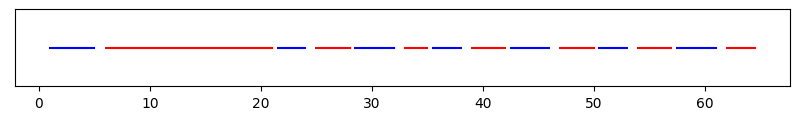

In [8]:
start_t = 1.0
end_t = 64.5
transience_windows = [
    (1., 5.),
    (21.5, 24.),
    (28.5, 32.),
    (35.5, 38.),
    (42.5, 46.),
    (50.5, 53.),
    (57.5, 61.)
]

non_transience_windows = [
    (6., 21.),
    (25., 28.),
    (33., 35.),
    (39., 42.),
    (47., 50.),
    (54., 57.),
    (62., 64.5)
]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 1))
ax.set_yticks([])
for start_t, end_t in transience_windows:
    ax.plot([start_t, end_t], [0., 0.], color='blue')
for start_t, end_t in non_transience_windows:
    ax.plot([start_t, end_t], [0., 0.], color='red')

In [9]:
uniform_profile = sample_at_density(1., 64.5, 0.7)
for _, (t0, t1) in perturbation_windows.items():
    round_nearest_value(uniform_profile, t0)
    round_nearest_value(uniform_profile, t1)

for t in uniform_profile:
    print(t)

1.0
2.4000000000000004
3.9000000000000004
5.300000000000001
6.7
8.1
9.600000000000001
11.0
12.4
13.9
15.3
16.7
18.1
19.6
21.5
22.400000000000002
23.900000000000002
25.3
26.700000000000003
28.5
29.6
31.0
32.4
33.9
35.5
36.7
38.1
39.6
41.0
42.5
43.900000000000006
45.300000000000004
46.7
48.1
49.6
50.5
52.400000000000006
53.900000000000006
55.300000000000004
56.7
57.5
59.6
61.0
62.400000000000006
63.900000000000006


In [10]:
transient_profile = np.sort(np.concatenate(
    [sample_at_density(start, end, 1.40) for start, end in transience_windows]
    +
    [sample_at_density(start, end, 0.3) for start, end in non_transience_windows]
))

for t in transient_profile:
    print(t)

1.0
1.7000000000000002
2.4000000000000004
3.1
3.9000000000000004
4.6000000000000005
6.0
9.3
12.700000000000001
16.0
19.3
21.5
22.200000000000003
22.900000000000002
23.6
25.0
28.5
29.200000000000003
29.900000000000002
30.6
31.400000000000002
33.0
35.5
36.2
36.9
37.6
39.0
42.5
43.2
43.900000000000006
44.6
45.400000000000006
47.0
50.5
51.2
51.900000000000006
52.6
54.0
57.5
58.2
58.900000000000006
59.6
60.400000000000006
62.0


In [11]:
anti_transient_profile = np.sort(np.concatenate(
    [sample_at_density(start, end, 0.25) for start, end in transience_windows]
    +
    [sample_at_density(start, end, 1.03) for start, end in non_transience_windows]
))

for t in anti_transient_profile:
    print(t)

1.0
6.0
7.0
7.9
8.9
9.9
10.9
11.8
12.8
13.8
14.700000000000001
15.700000000000001
16.7
17.7
18.6
19.6
20.6
21.5
25.0
26.0
26.900000000000002
27.900000000000002
28.5
33.0
34.0
34.9
35.5
39.0
40.0
40.900000000000006
41.900000000000006
42.5
47.0
48.0
48.900000000000006
49.900000000000006
50.5
54.0
55.0
55.900000000000006
56.900000000000006
57.5
62.0
63.0
63.900000000000006


In [12]:
# transience_profile = [
#     1., 2., 3., 4., 5., # initial transience, once a day
#     7., 9., 11., 13., 15., 17., 19., 21.,  # NON-TRANSIENCE: every 2 days
#     21.5, 22., 23., 24., # HFD starts here, once a day (plus the window boundary itself)
#     25., 27.,  # NON-TRANSIENCE: every 2 days
#     28.5, 29., 30., 31., # HFD ends here, once a day (plus the window boundary itself)
#     33., 35., 
#     35.5, 36., 37., 38., # V starts here
#     40., 42.,
#     42.5, 43., 44., 45., # V ends here
#     47., 49.,
#     50.5, 51., 52., 53., # G starts here
#     55., 57.,
#     57.5, 58., 59., 60., # G ends here
#     62., 64.,
# ]
# print(len(transience_profile))

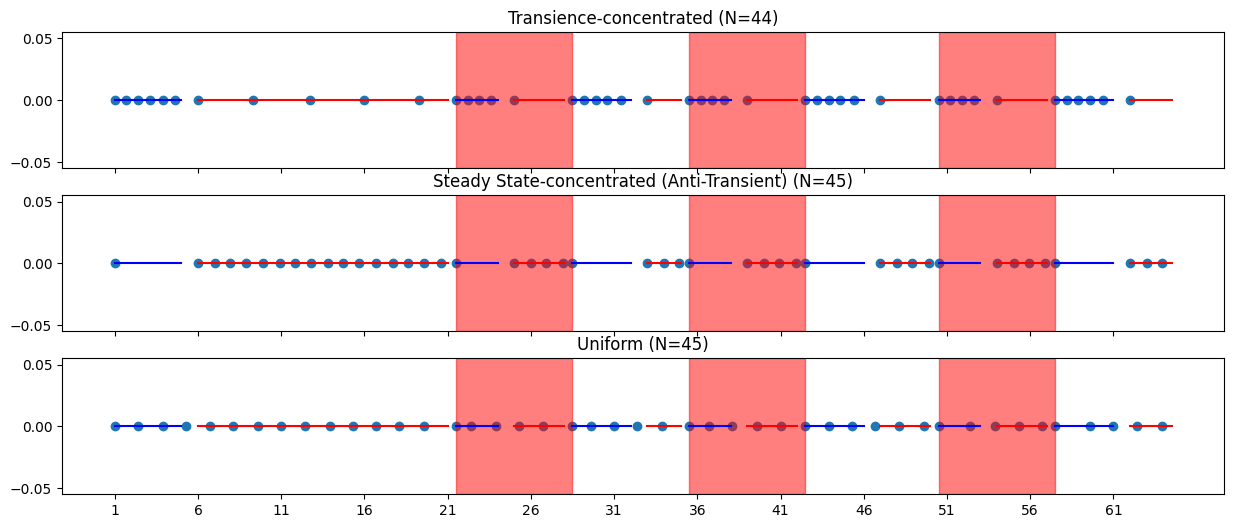

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(15, 6), sharex=True)
axes[0].set_xticks(np.arange(1, 66, 5))
axes[0].scatter(x=transient_profile, y=len(transient_profile) * [0.0])
axes[0].set_title("Transience-concentrated (N={})".format(
    len(transient_profile)
))

axes[1].scatter(x=anti_transient_profile, y=len(anti_transient_profile) * [0.0])
axes[1].set_title("Steady State-concentrated (Anti-Transient) (N={})".format(
    len(anti_transient_profile)
))

axes[2].scatter(x=uniform_profile, y=len(uniform_profile) * [0.0])
axes[2].set_title("Uniform (N={})".format(
    len(uniform_profile)
))


for ax in axes:
    for pert, (p_start, p_end) in perturbation_windows.items():
        ax.axvspan(p_start, p_end, alpha=0.5, color='red')
    for start_t, end_t in transience_windows:
        ax.plot([start_t, end_t], [0., 0.], color='blue')
    for start_t, end_t in non_transience_windows:
        ax.plot([start_t, end_t], [0., 0.], color='red')

# Example trajectory

In [90]:
from pathlib import Path
traj_repl = 5
n_perts = 3

traj_dir = Path("/data/local/MDSINE2_Paper/datasets/semisynthetic2") / f"trajectory_replicate_{traj_repl}" / f"perts_{n_perts}" / "trajectories"

sim_timepoints = np.load(traj_dir / "timepoints.npy")
sim_trajs = np.load(traj_dir / "trajectories.npy")
print(sim_trajs.shape)

(8, 141, 6351)


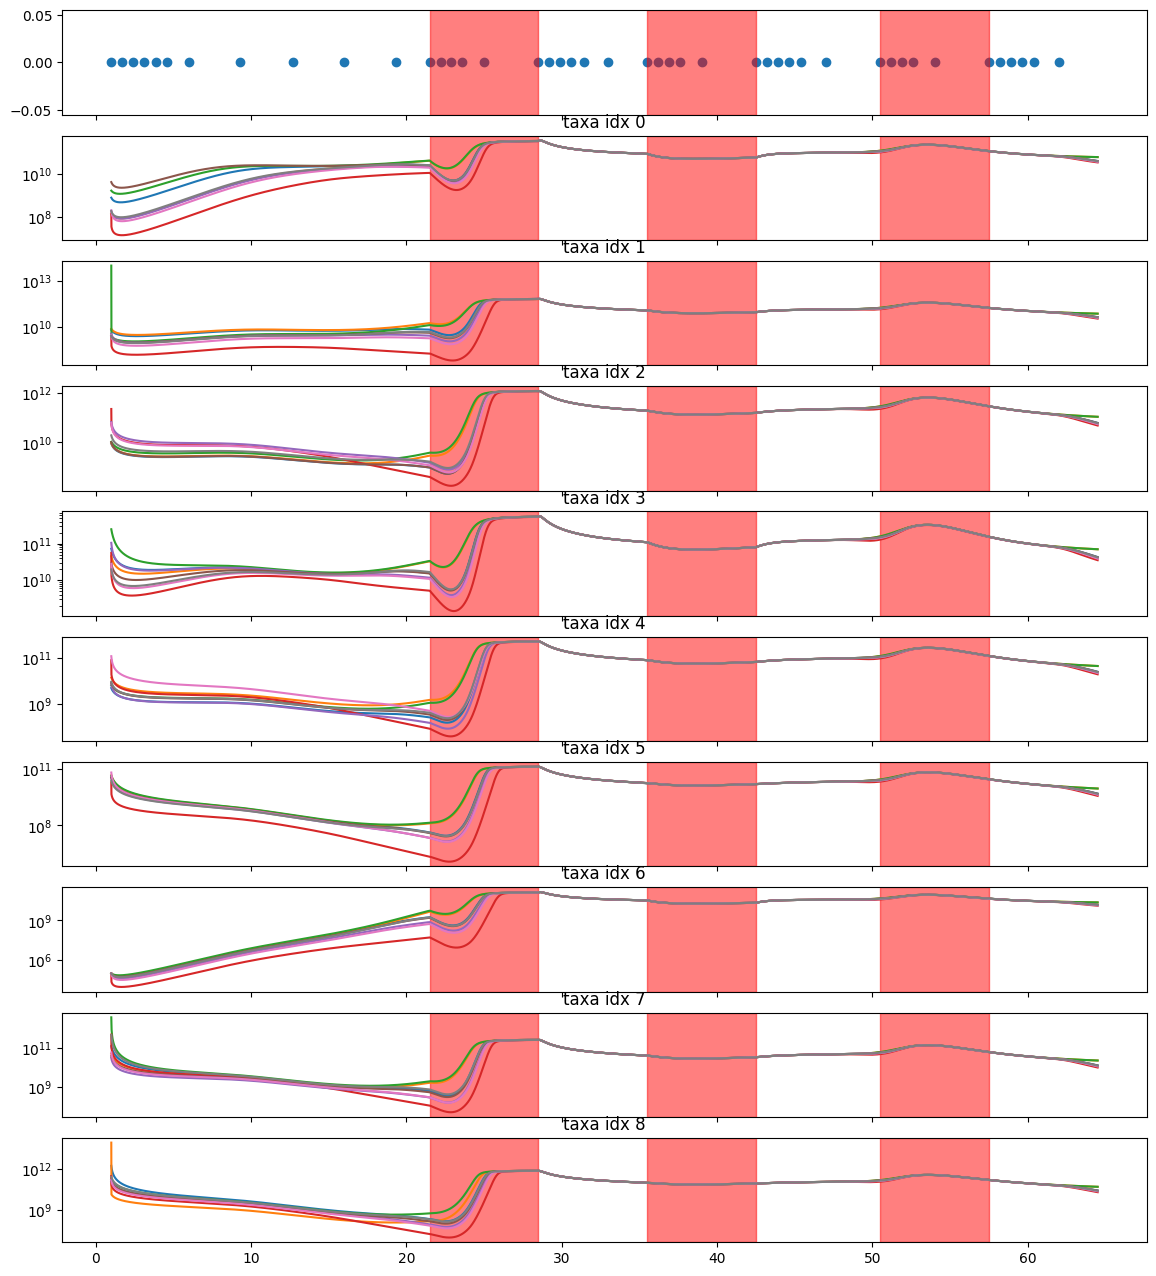

In [91]:
fig, axes = plt.subplots(10, 1, figsize=(14, 16), sharey=False, sharex=True)
axes[0].scatter(x=transient_profile, y=len(transient_profile) * [0.0])

for ax in axes:
    for pert, (p_start, p_end) in perturbation_windows.items():
        ax.axvspan(p_start, p_end, alpha=0.5, color='red')
        

axes = axes[1:]
taxa_indices = list(range(sim_trajs.shape[1]))
for taxa_idx, ax in zip(taxa_indices[0:], axes):
    for mouse_idx in [0, 1, 2, 3, 4, 5, 6, 7]: 
        _traj = sim_trajs[mouse_idx, taxa_idx, :]
        ax.plot(sim_timepoints, _traj)
        ax.set_title("taxa idx {}".format(taxa_idx))
    ax.set_yscale('log')